In [103]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
docs= pd.read_csv('https://raw.githubusercontent.com/spambstrs/CoronaVirus/master/spam.csv',encoding='latin')
docs.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
docs = docs[['v1','v2']]

In [0]:
docs.rename(columns = {'v1':'label','v2':'sms'},inplace=True)

In [106]:
docs.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [107]:
#df.column_name.value_counts() - gives no. of unique inputs in that columns
docs.sms.value_counts()

Sorry, I'll call later                                                                                                                                       30
I cant pick the phone right now. Pls send a message                                                                                                          12
Ok...                                                                                                                                                        10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"     4
Ok.                                                                                                                                                           4
                                                                                                                                                             ..
Can come my room but cannot come my hous

In [108]:
ham_spam=docs.label.value_counts()
ham_spam

ham     4825
spam     747
Name: label, dtype: int64

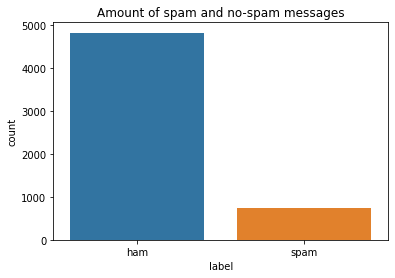

In [109]:
sn.countplot(data = docs, x = docs["label"]).set_title("Amount of spam and no-spam messages")
plt.show()

In [110]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  13.406317300789663


In [0]:
# mapping labels to 1 and 0
docs['label'] = docs.label.map({'ham':0, 'spam':1})

In [112]:
docs.head()

,label,sms
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
X=docs.sms
y=docs.label

In [114]:
X = docs.sms
y = docs.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [0]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [116]:
X_train.head()

710     Height of Confidence: All the Aeronautics prof...
3740                                        2/2 146tf150p
2711    Wen ur lovable bcums angry wid u, dnt take it ...
3155                    Long time. You remember me today.
3748    Dear Voucher Holder 2 claim your 1st class air...
Name: sms, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorising the text
vect = CountVectorizer(stop_words='english')

In [118]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [119]:
vect.vocabulary_

{'height': 3185,
 'confidence': 1844,
 'aeronautics': 799,
 'professors': 5083,
 'wer': 6971,
 'calld': 1511,
 'amp': 895,
 'askd': 1021,
 'sit': 5790,
 'aeroplane': 800,
 'aftr': 815,
 'sat': 5533,
 'told': 6506,
 'dat': 2058,
 'plane': 4891,
 'ws': 7115,
 'students': 6127,
 'dey': 2161,
 'hurried': 3340,
 'bt': 1443,
 'didnt': 2179,
 'said': 5505,
 '146tf150p': 290,
 'wen': 6966,
 'ur': 6724,
 'lovable': 3976,
 'bcums': 1193,
 'angry': 908,
 'wid': 7004,
 'dnt': 2246,
 'seriously': 5642,
 'coz': 1932,
 'childish': 1680,
 'true': 6592,
 'way': 6922,
 'showing': 5737,
 'deep': 2097,
 'affection': 804,
 'care': 1554,
 'luv': 4014,
 'kettoda': 3682,
 'manda': 4083,
 'nice': 4485,
 'day': 2066,
 'da': 2029,
 'long': 3945,
 'time': 6464,
 'remember': 5316,
 'today': 6498,
 'dear': 2076,
 'voucher': 6841,
 'holder': 3254,
 'claim': 1717,
 '1st': 325,
 'class': 1724,
 'airport': 843,
 'lounge': 3973,
 'passes': 4769,
 'using': 6747,
 'holiday': 3256,
 '08704439680': 83,
 'booking': 1339,
 'q

In [120]:
vect.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '0870121318

In [0]:
# transform
X_train_transformed = vect.transform(X_train)
X_test_tranformed =vect.transform(X_test)

In [122]:
from sklearn.naive_bayes import BernoulliNB

# instantiate bernoulli NB object
bnb = BernoulliNB()

# fit 
bnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = bnb.predict(X_test_tranformed)

# predict probability
y_pred_proba =bnb.predict_proba(X_test_tranformed)

# accuracy
print("Accuracy :")
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


Accuracy :


0.9784637473079684

In [123]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [124]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1213,    0],
       [  30,  150]])

Confusion Matrix

In [125]:
print("Confusion Matrix :")

confusion = metrics.confusion_matrix(y_test, y_pred_class)
df = pd.DataFrame(docs, columns=['y_test','y_pred_class'])
confusion_matrix = pd.crosstab(df['y_test'], df['y_pred_class'], rownames=['Actual'], colnames=['Predicted'])
try:
  sn.heatmap(confusion_matrix, annot=True)
except ValueError:
  pass
plt.show()
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

Confusion Matrix :
[[1213    0]
 [  30  150]]


In [126]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8333333333333334


In [127]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 1.0


In [128]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 1.0
1.0


In [129]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 1.0
PRECISION SCORE : 1.0
RECALL SCORE : 0.8333333333333334
F1 SCORE : 0.9090909090909091


In [130]:
y_pred_proba

array([[9.99999999e-01, 7.54187017e-10],
       [1.00000000e+00, 4.32813033e-10],
       [9.99998476e-01, 1.52446240e-06],
       ...,
       [9.99999999e-01, 6.31454144e-10],
       [1.00000000e+00, 8.01472121e-11],
       [9.99999999e-01, 1.10531446e-09]])

In [0]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [132]:
print (roc_auc)

0.9906338737748466


In [133]:
print(true_positive_rate)

[0.         0.26111111 0.28333333 0.28888889 0.31111111 0.33333333
 0.35       0.36666667 0.37777778 0.50555556 0.51666667 0.53333333
 0.54444444 0.67222222 0.68333333 0.86666667 0.86666667 0.87777778
 0.87777778 0.88888889 0.9        0.9        0.93333333 0.93333333
 0.95       0.95       0.96111111 0.96111111 0.96666667 0.96666667
 0.97222222 0.97222222 0.97777778 0.97777778 0.97777778 0.97777778
 0.98333333 0.98333333 0.98333333 0.98333333 0.98333333 0.98333333
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889
 0.98888889 0.98888889 0.98888889 0.98888889 0.98888889 0.9888

In [134]:
print(false_positive_rate)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.24402308e-04 8.24402308e-04 2.47320692e-03 2.47320692e-03
 2.47320692e-03 3.29760923e-03 3.29760923e-03 4.12201154e-03
 4.12201154e-03 6.59521847e-03 6.59521847e-03 9.89282770e-03
 9.89282770e-03 1.07172300e-02 1.07172300e-02 1.40148392e-02
 1.40148392e-02 2.06100577e-02 2.22588623e-02 2.55564716e-02
 2.55564716e-02 5.77081616e-02 5.93569662e-02 8.07914262e-02
 8.24402308e-02 9.15086562e-02 9.15086562e-02 1.13767519e-01
 1.15416323e-01 1.16240725e-01 1.17889530e-01 1.47568013e-01
 1.49216818e-01 1.51690025e-01 1.53338829e-01 1.54163232e-01
 1.57460841e-01 1.64056059e-01 1.65704864e-01 1.69826876e-01
 1.71475680e-01 2.15169002e-01 2.18466612e-01 2.39901072e-01
 2.41549876e-01 2.47320692e-01 2.48969497e-01 2.58862325e-01
 2.60511129e-01 2.629843

In [135]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999997e-01 9.99999997e-01 9.99999993e-01
 9.99999989e-01 9.99991965e-01 9.99991834e-01 1.83665763e-01
 1.80568442e-01 1.47614707e-01 6.25143366e-02 4.46683644e-02
 1.15092437e-02 9.58476893e-03 6.40716207e-04 2.18108056e-04
 9.35793262e-05 5.83613440e-05 2.12185228e-05 3.38306213e-06
 3.04416654e-06 3.00598668e-06 2.17804973e-06 1.24238837e-06
 1.12618344e-06 5.21992419e-07 4.85275902e-07 4.25670183e-07
 3.13061033e-07 4.17682414e-08 4.07561102e-08 2.00031803e-08
 1.98722123e-08 1.70029249e-08 1.67687506e-08 8.66243694e-09
 8.57789347e-09 8.57671244e-09 8.44158396e-09 4.70235973e-09
 4.68626775e-09 4.53938875e-09 4.53516466e-09 4.45231150e-09
 4.44702175e-09 4.21032284e-09 4.16036996e-09 3.69513780e-09
 3.68351626e-09 2.15859835e-09 2.14010540e-09 1.60201909e-09
 1.59977948e-09 1.45405039e-09 1.42634194e-09 1.31186749e-09
 1.29396765e-09 1.267779

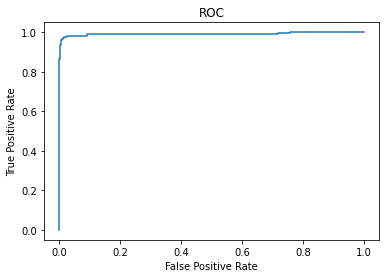

In [136]:
%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)